In [32]:

# Imports
import pandas as pd
import numpy as np
import math
import seaborn as sns
import scipy.stats as stats

### Gaussian Integral
We want to assess the integral of the product of two Gaussian functions.
$$\int_{-\infty}^{\infty} f(x) g(x) dx$$

$$ where $$

$$f(x) = \frac{1}{\sqrt{2 \pi \sigma_1^2}} exp({-\frac{(x - \mu_1)^2}{2 \sigma_1^2}}) \quad \& \quad g(x) = \frac{1}{\sqrt{2 \pi \sigma_2^2}} exp({-\frac{(\mu_2 - x)^2}{2 \sigma_2^2}})$$

<br></br>

However, we are not able to calculate an infinite integral with a computer. We will replace the bounds of $(-\infty,\infty)$ with a finite interval of $(a, b)$.
$$\int_{a}^{b} f(x) g(x) dx$$

We will also calculate the integral using the following method:
$$\sum_{i=1}^{N} \sqrt{\Delta{x}} f(a + i \Delta{x}) * \sqrt{\Delta{x}} g(a + i \Delta{x})$$

In [33]:
# Defines the Integration parameters
bounds = (-5, 5)
N = 100
delta = (bounds[1] - bounds[0]) / N

# Defines the Gaussian parameters
mu1 = 0
mu2 = 1
sig1 = 1
sig2 = 1

In [34]:
# First Gaussian Function
def f(x, mu1=mu1, sig1=sig1):
    return (1 / (math.sqrt(2 * math.pi) * sig1)) * math.exp((-1 * ((mu1 - x) ** 2)) / (2 * (sig1 ** 2)))

In [35]:
# Second Gaussian Function
def g(x, mu2=mu2, sig2=sig2):
    return (1 / (math.sqrt(2 * math.pi) * sig2)) * math.exp((-1 * ((x - mu2) ** 2)) / (2 * (sig2 ** 2)))

In [36]:
# Creates the two matrixes Ai and Bi
Ai = np.vectorize(f)(np.arange(bounds[0], bounds[1] + delta, delta))
Bi = np.vectorize(g)(np.arange(bounds[0], bounds[1] + delta, delta))

# Scales the matrixes
Ai *= math.sqrt(delta)
Bi *= math.sqrt(delta)

In [37]:
# Dot product of the matrixes
np.matmul(Ai, Bi)

0.21969564472073824

### Visualizing Gaussian Curves

Below displays the gaussian curves that we are currently calculating the product of.

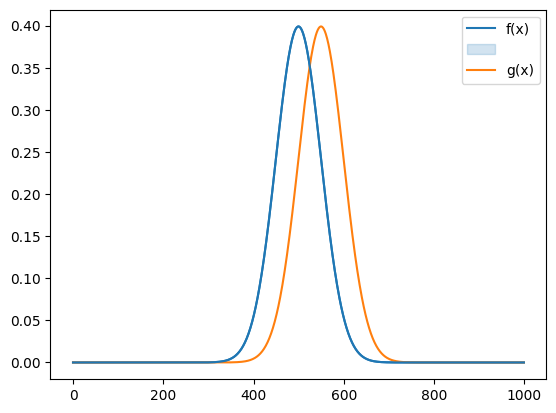

In [38]:
# Visualization of the two curves
def norm_dis():
    x = np.linspace(-10, 10, 1000)
    y1 = stats.norm.pdf(x, loc=mu1, scale=sig1)
    y2 = stats.norm.pdf(x, loc=mu2, scale=sig2)
    plt = sns.lineplot(y1)
    plt.add_line(sns.lineplot(y2).lines[0])
    plt.legend(['f(x)', '', 'g(x)'])

norm_dis()

### Adjusting N

To find the value of the integral, with the bounds of $(-5, 5)$, we will adjust the number of points used to calculate the integral meaning adjusting the value of $N$ and plotting the results to visualize if the integral converges to a solution as N increases.

In [39]:
# Calculates product between two gaussian curves
def gauss_product(mu1=mu1, mu2=mu2, sig1=sig1, sig2=sig2, a=bounds[0], b=bounds[1], N=N):
    # Calculates new delta
    delta = (b - a) / N
    
    # Creates the two matrixes Ai and Bi
    Ai = np.vectorize(f)(np.arange(a, b + delta, delta), mu1=mu1, sig1=sig1)
    Bi = np.vectorize(g)(np.arange(a, b + delta, delta), mu2=mu2, sig2=sig2)
    
    # Scales the matrixes
    Ai *= math.sqrt(delta)
    Bi *= math.sqrt(delta)
    
    return np.matmul(Ai, Bi)

The integral is approximately 0.2196956447208079


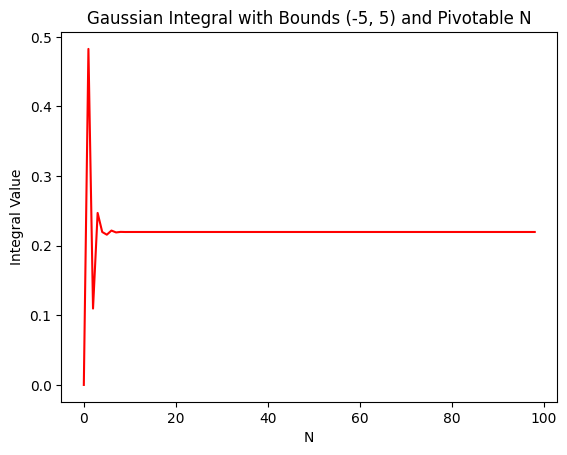

In [40]:
res = np.vectorize(gauss_product)(N=np.arange(1, 100, 1))

# Plots the results
plt = sns.lineplot(res)
plt.set_title('Gaussian Integral with Bounds (-5, 5) and Pivotable N')
plt.set_xlabel('N')
plt.set_ylabel('Integral Value')
plt.lines[0].set_color('red')

print('The integral is approximately', res[-1])

### Trying Different Bounds

We want to see how different bounds of the integral affect the resulting product because if we recall, we are using fixed bounds but our main integral is from $(-\infty, \infty)$.

The integral for bounds (-5, 5) is approximately 0.2196956447208079
The integral for bounds (-10, 10) is approximately 0.21969564473386075
The integral for bounds (-100, 100) is approximately 0.21905324859376046


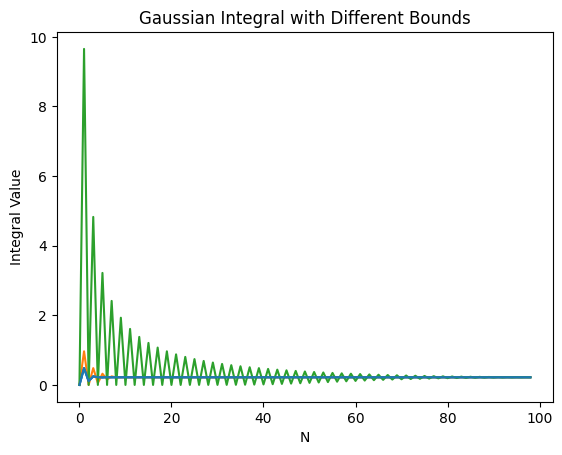

In [41]:
# Lets Increase the Bounds to (-10, 10) and (-100, 100) and see what happens
res2 = np.vectorize(gauss_product)(N=np.arange(1, 100, 1), a=-10, b=10)
res3 = np.vectorize(gauss_product)(N=np.arange(1, 100, 1), a=-100, b=100)

# Plots the results
plt = sns.lineplot(res)
plt.add_line(sns.lineplot(res2).lines[0])
plt.add_line(sns.lineplot(res3).lines[0])

plt.set_title('Gaussian Integral with Different Bounds')
plt.set_xlabel('N')
plt.set_ylabel('Integral Value')

print('The integral for bounds (-5, 5) is approximately', res[-1])
print('The integral for bounds (-10, 10) is approximately', res2[-1])
print('The integral for bounds (-100, 100) is approximately', res3[-1])

### Adjusting Gaussian Parameters
No matter the bounds, the results converges to a number close to $0.21969$ because bigger bounds mostly dealt with the outliers which get smaller the further the bounds increase. The current assumption I am making from logical deduction is that the larger the sigma gets, the bigger the bounds we will need to make to converge to a more realistic solution. When we increase bounds, we need to make sure to increase the N parameter because larger bounds took much longer to converge to the solution as shown from the analysis above.

Here we will begin by adjusting $\mu_1$ and then adjust $\mu_2$ to see how it affects the product.

The integral for Mu1 = 0 is approximately 0.21969564473386075


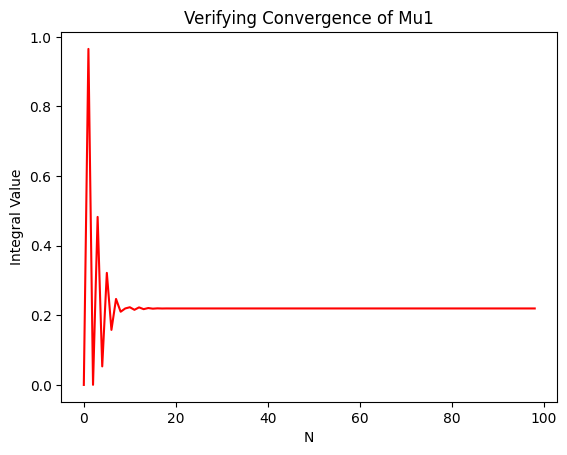

In [42]:
success_mu1 = []

def mu1_converge(mu):
    mu_res = np.vectorize(gauss_product)(N=np.arange(1, 100, 1), a=-10, b=10, mu1=mu)

    # Plots the results
    plt = sns.lineplot(mu_res)
    plt.set_title('Verifying Convergence of Mu1')
    plt.set_xlabel('N')
    plt.set_ylabel('Integral Value')
    plt.lines[0].set_color('red')

    print('The integral for Mu1 =', mu, 'is approximately', mu_res[-1])
    return mu_res[-1]

# Appends successful convergence
success_mu1.append(mu1_converge(0))

The integral for Mu1 = 1 is approximately 0.28209479177387753
The integral for Mu1 = 2 is approximately 0.21969564473386075
The integral for Mu1 = 3 is approximately 0.10377687435514846
The integral for Mu1 = 4 is approximately 0.029732572305907284


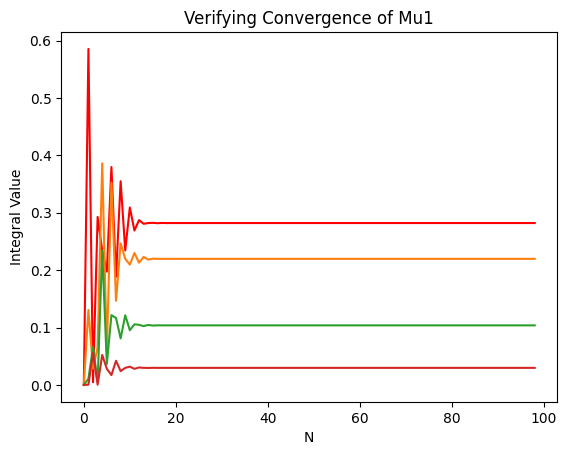

In [43]:
# Tries a few more mu1 values
for i in range(1, 5):
    success_mu1.append(mu1_converge(i))

The integral for Mu1 = 5 is approximately 0.005166746338523003
The integral for Mu1 = 6 is approximately 0.0005445710575881763


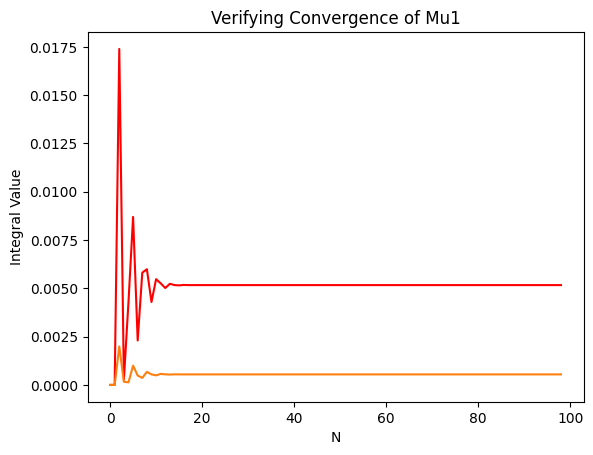

In [44]:
# Tries a few more mu1 values
for i in range(5, 7):
    success_mu1.append(mu1_converge(i))

Text(0, 0.5, 'Integral Value')

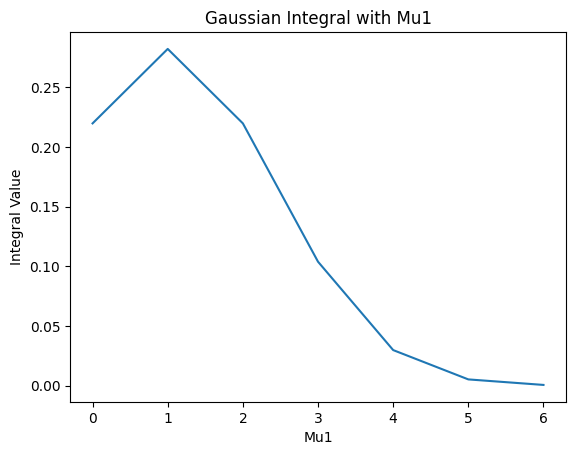

In [45]:
# Plots the results
plt = sns.lineplot(success_mu1)

plt.set_title('Gaussian Integral with Mu1')
plt.set_xlabel('Mu1')
plt.set_ylabel('Integral Value')

The integral for Mu2 = 1 is approximately 0.21969564473386075


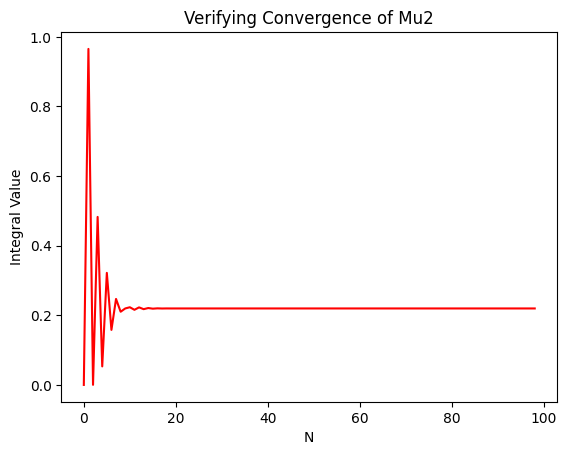

In [53]:
success_mu2 = []

def mu2_converge(mu):
    mu_res = np.vectorize(gauss_product)(N=np.arange(1, 100, 1), a=-10, b=10, mu2=mu)

    # Plots the results
    plt = sns.lineplot(mu_res)
    plt.set_title('Verifying Convergence of Mu2')
    plt.set_xlabel('N')
    plt.set_ylabel('Integral Value')
    plt.lines[0].set_color('red')

    print('The integral for Mu2 =', mu, 'is approximately', mu_res[-1])
    return mu_res[-1]

# Appends successful convergence
success_mu2.append(mu2_converge(1))

The integral for Mu2 = 2 is approximately 0.10377687435514846
The integral for Mu2 = 3 is approximately 0.029732572305907284
The integral for Mu2 = 4 is approximately 0.005166746338523003


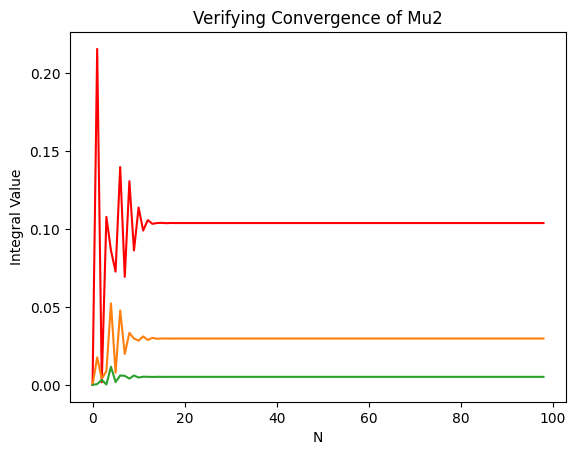

In [54]:
# Tries a few more mu1 values
for i in range(2, 5):
    success_mu2.append(mu2_converge(i))

The integral for Mu2 = 5 is approximately 0.0005445710575881763
The integral for Mu2 = 6 is approximately 3.481326298668689e-05


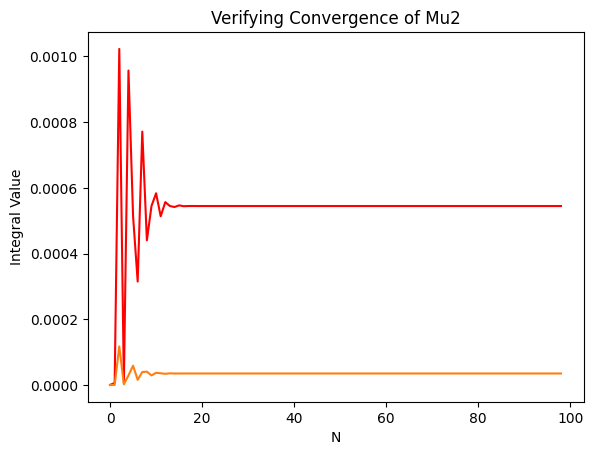

In [55]:
# Tries a few more mu1 values
for i in range(5, 7):
    success_mu2.append(mu2_converge(i))

C:\Users\pande\AppData\Local\Temp\ipykernel_30344\1013201767.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.set_xticklabels([i for i in range(len(success_mu2) + 1)])


Text(0, 0.5, 'Integral Value')

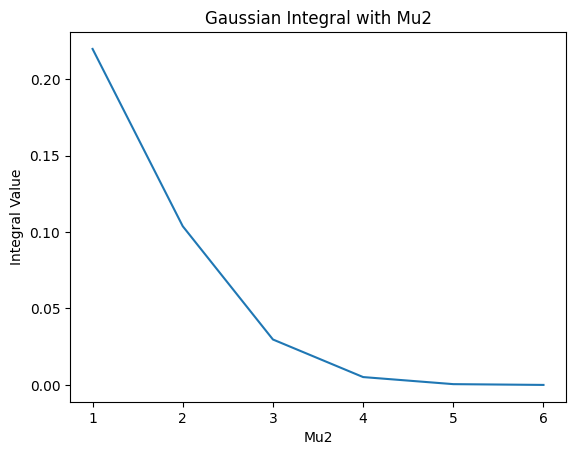

In [59]:
# Plots the results
plt = sns.lineplot(success_mu2)
plt.set_xticklabels([i for i in range(len(success_mu2) + 1)])

plt.set_title('Gaussian Integral with Mu2')
plt.set_xlabel('Mu2')
plt.set_ylabel('Integral Value')

### Conclusion

From the results above, we can assess that as mu1 or mu2 get bigger, the resulting integral value approaches zero. However, if mu is growing from 0 to 1, the integral value increases and then drops once and starts approaching 0.